In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("/content/new_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,COMMUNITY,RANK,COM.RANK,AGGR MARK,COLLEGE CODE,BRANCH CODE
0,1,BC,5,3.0,200.00,1,CS
1,2,SC,7,1.0,200.00,1,CS
2,3,BC,8,4.0,200.00,1,CS
3,4,BC,10,6.0,200.00,1,EC
4,6,OC,12,8.0,199.75,1,EE


##Data Preprocessing

In [7]:
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['BRANCH CODE'],axis=1)
dfc1 = df.loc[df['COLLEGE CODE'] == 1]
dfc2 = df.loc[df['COLLEGE CODE'] == 0]
dfc2 = dfc2.sample(frac = 1)
dfc2 = dfc2.head(4500)
df = pd.concat([dfc1,dfc2], axis=0)
df = df.sample(frac = 1)
community = {'BC':1,'SC':2,'OC':3,'BCM':4,'MBC':5,'SCA':6,'ST':7,'MBC/DNC':5,'MBCV':5,'MBCDNC':5}
df.COMMUNITY = [community[item] for item in df.COMMUNITY]
dfs = df.sort_values(['RANK','AGGR MARK'],ascending=[True,False])

In [51]:
print(df.isnull().sum())

COMMUNITY       0
RANK            0
COM.RANK        0
AGGR MARK       0
COLLEGE CODE    0
dtype: int64


In [52]:
print(df.corr())

              COMMUNITY      RANK  COM.RANK  AGGR MARK  COLLEGE CODE
COMMUNITY      1.000000  0.036828 -0.072574  -0.037201      0.094713
RANK           0.036828  1.000000  0.181917  -0.777396     -0.538563
COM.RANK      -0.072574  0.181917  1.000000  -0.134598     -0.141082
AGGR MARK     -0.037201 -0.777396 -0.134598   1.000000      0.478241
COLLEGE CODE   0.094713 -0.538563 -0.141082   0.478241      1.000000


In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9306 entries, 7003 to 54450
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COMMUNITY     9306 non-null   int64  
 1   RANK          9306 non-null   int64  
 2   COM.RANK      9306 non-null   float64
 3   AGGR MARK     9306 non-null   float64
 4   COLLEGE CODE  9306 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 436.2 KB
None


In [54]:
print(df.describe())

         COMMUNITY          RANK       COM.RANK    AGGR MARK  COLLEGE CODE
count  9306.000000   9306.000000    9306.000000  9306.000000   9306.000000
mean      2.363099   8532.939286    5008.342688   188.446392      0.516441
std       1.729974   8583.757667    7875.804664     8.173411      0.499756
min       1.000000      1.000000       1.000000   151.500000      0.000000
25%       1.000000   1420.250000    2562.500000   183.762500      0.000000
50%       1.000000   5692.000000    5905.195401   190.000000      1.000000
75%       4.000000  13297.250000    5905.195401   194.500000      1.000000
max       7.000000  44774.000000  564925.000000   200.000000      1.000000


##Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


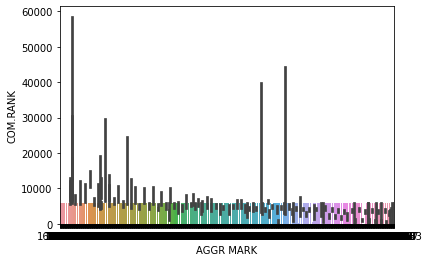

In [59]:
sns.barplot(df["AGGR MARK"],df["COM.RANK"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


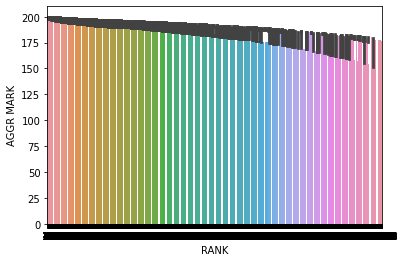

In [58]:
sns.barplot(df["RANK"],df["AGGR MARK"])

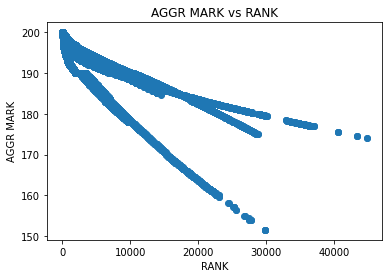

In [57]:
plt.scatter(df['RANK'],df['AGGR MARK'])
plt.title('AGGR MARK vs RANK')
plt.xlabel('RANK')
plt.ylabel('AGGR MARK')
plt.show()

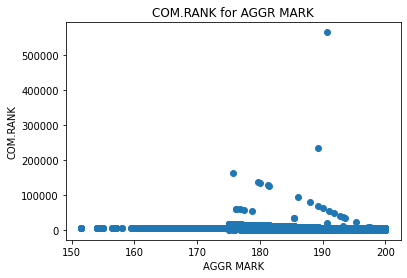

In [60]:
plt.scatter(df['AGGR MARK'],df['COM.RANK'])
plt.title('COM.RANK for AGGR MARK')
plt.xlabel('AGGR MARK')
plt.ylabel('COM.RANK')
plt.show()

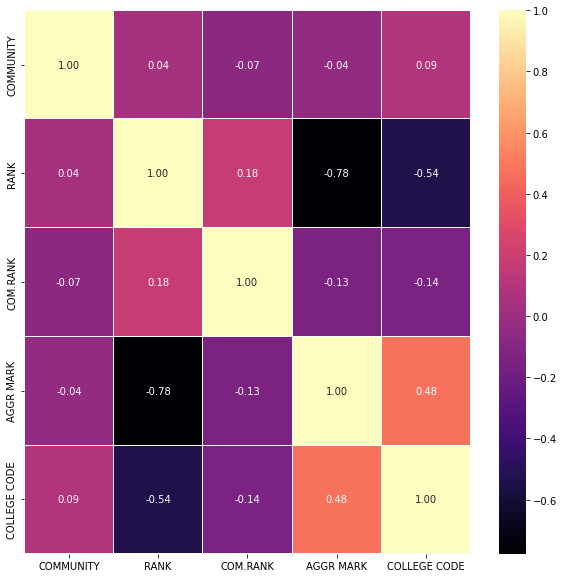

In [61]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

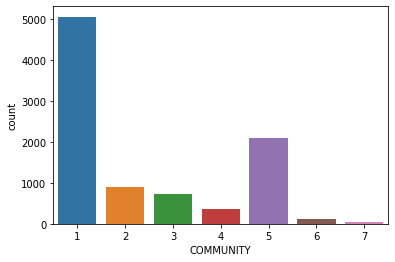

In [62]:
sns.countplot(x="COMMUNITY",data=df)

##Data Transformation

In [34]:
x = dfs.drop(['COLLEGE CODE'],axis=1)
x

,COMMUNITY,RANK,COM.RANK,AGGR MARK
40279,5,1,5905.195401,200.0000
19109,1,1,1.000000,200.0000
63491,1,1,5905.195401,200.0000
26049,1,1,5905.195401,199.6667
26050,3,2,5905.195401,199.6667
...,...,...,...,...
50491,7,43295,5905.195401,174.6350
63403,1,43300,5905.195401,174.6350
63445,1,43355,5905.195401,174.6050
63462,1,44763,5905.195401,174.1200


In [35]:
label = dfs['COLLEGE CODE']
label

40279    1
19109    1
63491    1
26049    1
26050    1
        ..
50491    1
63403    0
63445    0
63462    0
50492    1
Name: COLLEGE CODE, Length: 9306, dtype: int64

In [63]:
print(x.shape,label.shape)

(9306, 4) (9306,)


In [36]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size=0.15)

In [37]:
x_train

,COMMUNITY,RANK,COM.RANK,AGGR MARK
26252,3,462,5905.195401,194.50
33151,1,11597,5905.195401,176.00
5777,5,8592,1809.000000,191.00
40744,1,2004,5905.195401,194.00
15466,5,23211,5059.000000,179.75
...,...,...,...,...
18641,1,28055,16409.000000,175.50
51283,5,15281,5905.195401,185.69
3192,3,4345,2710.000000,194.50
38789,1,20725,5905.195401,162.50


In [38]:
y_train

26252    1
33151    0
5777     0
40744    1
15466    0
        ..
18641    0
51283    0
3192     0
38789    0
1013     1
Name: COLLEGE CODE, Length: 7910, dtype: int64

In [39]:
x_test

,COMMUNITY,RANK,COM.RANK,AGGR MARK
44445,5,5590,5905.195401,191.00
26282,3,555,5905.195401,194.00
26151,3,226,5905.195401,196.00
51645,1,15860,5905.195401,185.46
438,5,1349,220.000000,197.25
...,...,...,...,...
19470,1,1088,657.000000,192.50
63664,1,356,5905.195401,199.00
26719,1,3512,5905.195401,189.50
569,5,2193,382.000000,196.50


In [40]:
y_test

44445    0
26282    1
26151    1
51645    0
438      1
        ..
19470    1
63664    1
26719    1
569      1
32680    0
Name: COLLEGE CODE, Length: 1396, dtype: int64

In [64]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7910, 4)
(1396, 4)
(7910,)
(1396,)


In [65]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train[x_train.columns]=mms.fit_transform(x_train[x_train.columns].values)
x_test[x_test.columns]=mms.transform(x_test[x_test.columns].values)

##Model Building

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print(dt_pred)

[1 1 1 ... 0 1 1]


In [67]:
print(y_test)

44445    0
26282    1
26151    1
51645    0
438      1
        ..
19470    1
63664    1
26719    1
569      1
32680    0
Name: COLLEGE CODE, Length: 1396, dtype: int64


##Evaluation

In [68]:
from sklearn.metrics import accuracy_score
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree Classifier:  0.7313753581661891


##Saving the Model

In [69]:
import pickle
pickle.dump(dt,open('model.pkl','wb'))